2.688868892407241


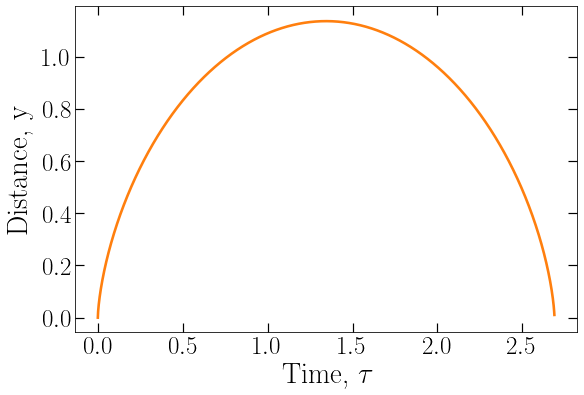

In [2]:
#### Reference paper https://arxiv.org/abs/1808.08219

#### Keeping tau_i fixed and then calculating y_i as per the value of 
#### tau_i.


import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

fig,ax = plt.subplots(1, figsize = (9, 6))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')

 
def j(t, y):
    r, dydtau = y
    dydtau2 = (2*gamma - (gamma**2))/(4*(r**3)) - 1/(r**2)
    return [dydtau, dydtau2]



gamma = 1e-10
delta_i = 1e-5


tau_i = 1e-8 
y_i =  ((9/2) * (1/(1 + delta_i)) * (tau_i**2))**(1/3)
v_i = (3 * (1/(1 + delta_i)) * (tau_i))/(y_i**2) 


tau_f = 6

y0 = [y_i, v_i]
tau_arr = np.linspace(tau_i, tau_f, 10000)
sol = solve_ivp(j, [tau_i, tau_f], y0, t_eval = tau_arr, method ='RK45', rtol=1e-8, atol=1e-10)

print(sol.t[-1])

plt.plot(sol.t, sol.y[0], 'C1')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel(r'Time, $\tau $', fontsize = 29)
plt.ylabel('Distance, y ', fontsize = 29, labelpad = 9)
plt.show()

3.4019012685534284


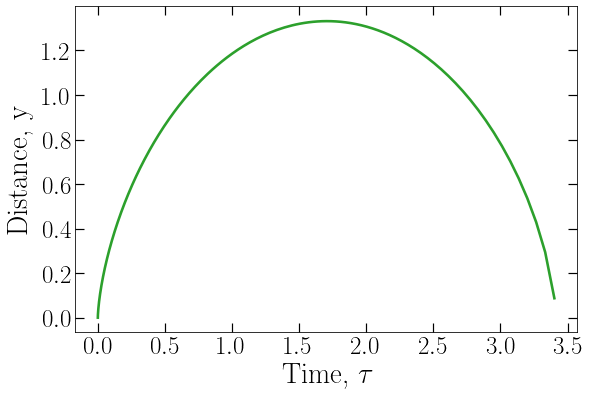

In [42]:
#### Keeping y_i fixed as 1e-5 and then calculating tau_i as per the value of 
#### y_i=1e-5.


fig,ax = plt.subplots(1, figsize = (9, 6))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')

 

y_i = 1e-5
tau_i =  ((2/9) * (1 + delta_i) * (y_i**3))**(1/2)
v_i = (3 * (1/(1 + delta_i)) * (tau_i))/(y_i**2)


tau_f = 10

y0 = [y_i, v_i]
tau_arr = np.geomspace(tau_i, tau_f, 1000)
sol = solve_ivp(j, [tau_i, tau_f], y0, t_eval = tau_arr, method ='RK45', rtol=1e-8, atol=1e-10, dense_output = True)


print(sol.t[-1])
plt.plot(sol.t, sol.y[0], 'C2')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel(r'Time, $\tau $', fontsize = 29)
plt.ylabel('Distance, y ', fontsize = 29, labelpad = 9)
plt.show()

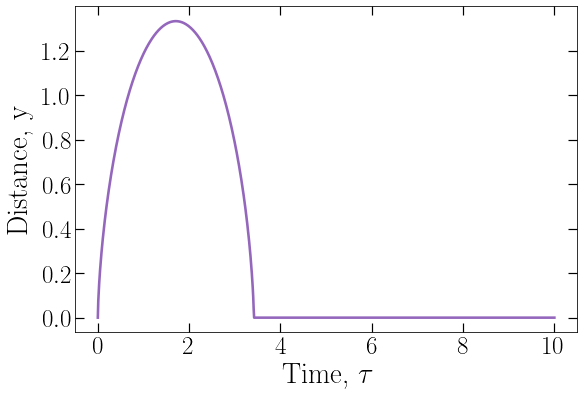

In [50]:
fig, ax = plt.subplots(1, figsize=(9, 6))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')


y_i = 1e-5
tau_i = ((2/9) * (1 + delta_i) * (y_i**3))**(1/2)
v_i = (3 * (1/(1 + delta_i)) * (tau_i))/(y_i**2)


tau_f = 10  
y0 = [y_i, v_i]
tau_arr = np.linspace(tau_i, tau_f, 1000)
y_arr = np.zeros(len(tau_arr))


for i, tau in enumerate(tau_arr):
    sol = solve_ivp(j, [tau_i, tau], y0, method='DOP853', rtol=1e-8, atol=1e-10)
    y_arr[i] =sol.y[0][-1]



plt.plot(tau_arr, y_arr, 'C4')  

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.show()

0.00243998629725955


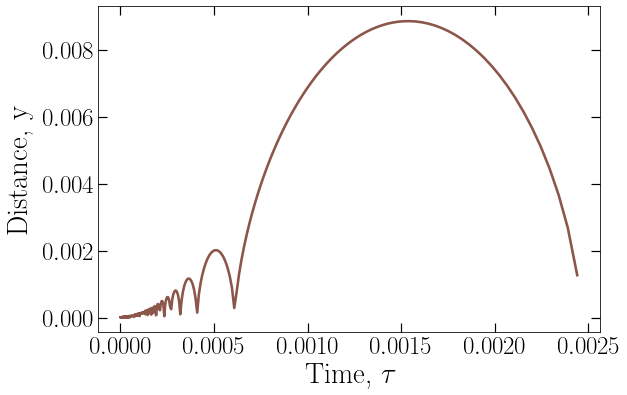

In [15]:
fig, ax = plt.subplots(1, figsize=(9, 6))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')


 
def f(t, y):
    r, dydtau = y
    dydtau2 = (2*gamma - (gamma**2))/(4*(r**3)) - 1/(r**2) - (4 *r/9 * (t**2))
    return [dydtau, dydtau2]


y_i = 1e-5     
tau_i = 1e-6   #((2/9) * (1 + delta_i) * (y_i**3))**(1/2)
H_i = 2 / (3 * tau_i)     
v_i = H_i * y_i 



tau_f = 1000

y0 = [y_i, v_i]
tau_arr = np.geomspace(tau_i, tau_f, 1000)
sol = solve_ivp(j, [tau_i, tau_f], y0, t_eval = tau_arr, method ='RK45', rtol=1e-8, atol=1e-10, dense_output = True)


print(sol.t[-1])
plt.plot(sol.t, sol.y[0], 'C5')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel(r'Time, $\tau $', fontsize = 29)
plt.ylabel('Distance, y ', fontsize = 29, labelpad = 9)
plt.show()